**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [47]:
#Reading Data from csv file.

df_weka = pd.read_csv('2Classdata.csv')
df_weka.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal
33,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,Abnormal
299,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338,Normal
131,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,Abnormal
14,57.300227,24.188885,47.000000,33.111342,116.806587,5.766947,Abnormal


# Explore the data set. Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset.
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [48]:
df_weka.head()      #Head of Data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [49]:
df_weka.tail()      #Tail of Data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [50]:
df_weka.isnull().values.any()

#DataFrame does not have any null values.

False

In [51]:
df_weka['class'].unique()

#Class column has only two values namely "Abnormal" and "Normal".

array(['Abnormal', 'Normal'], dtype=object)

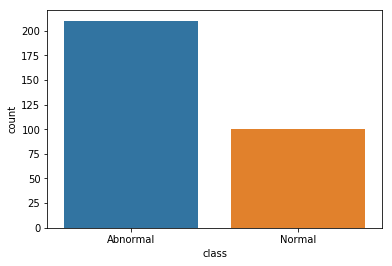

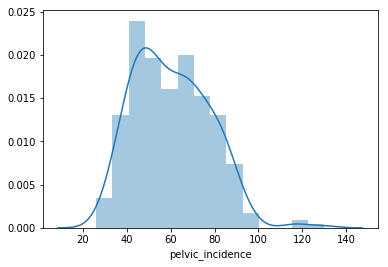

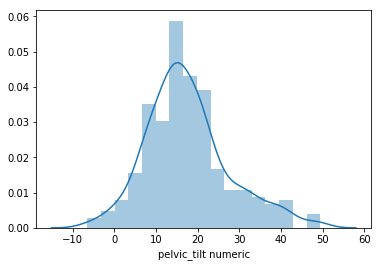

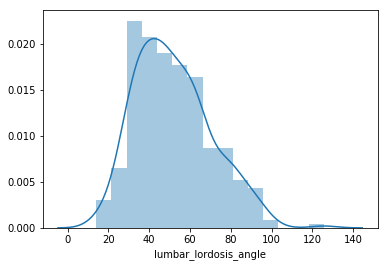

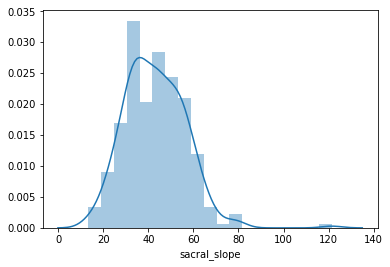

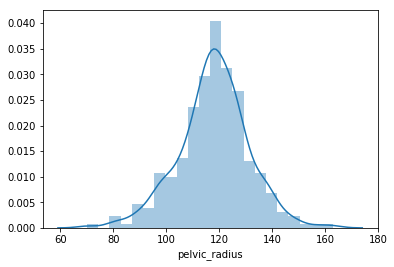

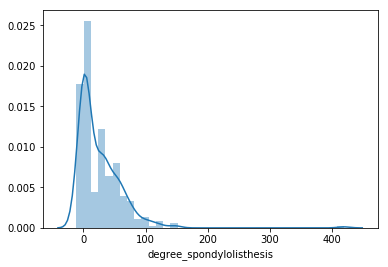

In [52]:
#Distribution of 'class' and all other attributes.

sns.countplot(x = 'class', data = df_weka)
plt.show()

sns.distplot(df_weka['pelvic_incidence'])
plt.show()

sns.distplot(df_weka['pelvic_tilt numeric'])
plt.show()

sns.distplot(df_weka['lumbar_lordosis_angle'])
plt.show()

sns.distplot(df_weka['sacral_slope'])
plt.show()

sns.distplot(df_weka['pelvic_radius'])
plt.show()

sns.distplot(df_weka['degree_spondylolisthesis'])
plt.show()

In [53]:
#Data types of dataset.

df_weka.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

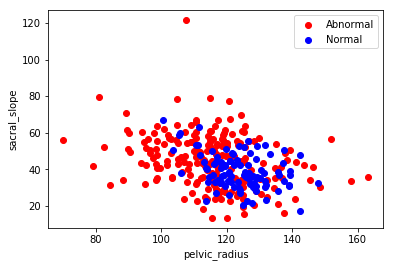

In [56]:
##This particular box of code was not in the file which was submitted.
A = df_weka[df_weka["class"] == "Abnormal"]
N = df_weka[df_weka["class"] == "Normal"]

plt.scatter(A.pelvic_radius,A.sacral_slope,color = "red",label = "Abnormal")
plt.scatter(N.pelvic_radius,N.sacral_slope,color = "blue",label = "Normal")
plt.xlabel("pelvic_radius")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()

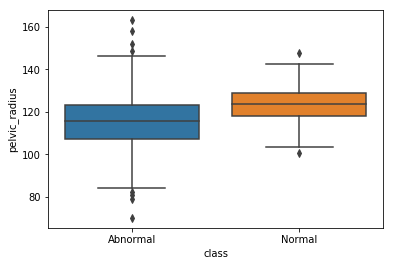

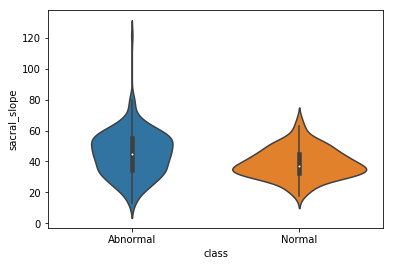

In [14]:
#Distribution of different classes for pelvic_radius and sacral_slope.

sns.boxplot(x = 'class', y = 'pelvic_radius', data = df_weka)
plt.show()

sns.violinplot(x = 'class', y = 'sacral_slope', data = df_weka)
plt.show()

# Encode the Class variable to integer.

In [15]:
#Method1 
#cleanup_nums = {'class':{'Abnormal':0, 'Normal':1}}
#df_weka.replace(cleanup_nums, inplace = True)
#df_weka['class'].map(cleanup_nums)

In [16]:
#Better Method

df_weka['class'] = df_weka['class'].astype('category')     #Changing dtype to category.
df_weka['class'] = df_weka['class'].cat.codes              #Using cat.codes accessor to get the corresponding codes.
df_weka.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
278,40.413366,-1.329412,30.982768,41.742778,119.335655,-6.173675,1
166,56.991404,6.874089,57.009005,50.117315,109.978045,36.810111,0
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,1
170,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,0
94,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [17]:
#Creating Feature Set.

X = df_weka.drop(['class'], axis = 1)

In [18]:
#Creating Target Set.

y = df_weka['class']

# Normalize your Data (X) to get values between 0 to 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()                          #Using MinMaxScaler for normalizing between 0 to 1.
model.fit(X)                                    #Learning mean and std. dev. of data.
scaled_features = model.transform(X)            #Transforming data.

In [20]:
#Converting scaled features into a DataFrame.

df_feat = pd.DataFrame(scaled_features, columns = df_weka.drop('class', axis = 1).columns)
df_feat.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Split the data as train and test with a ratio of 70:30.

In [21]:
#Splitting Data into training set and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size = 0.3, random_state =1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [22]:
#Building KNN model.

from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_rows', 500)

knn = KNeighborsClassifier(n_neighbors = 4)           #Fixing neighbors = 4
knn.fit(X_train,y_train)                              #Learning from the training set using .fit method.
pred = knn.predict(X_test)                            #Predicting Target values for Test Feature set.

In [23]:
#Checking classification report and confusion_matrix to see how model performed.

from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:', '\n', classification_report(y_test, pred))
print('\n')
print('Confusion Matrix:', '\n',confusion_matrix(y_test,pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.64      0.52      0.57        27

   micro avg       0.77      0.77      0.77        93
   macro avg       0.73      0.70      0.71        93
weighted avg       0.76      0.77      0.77        93



Confusion Matrix: 
 [[58  8]
 [13 14]]


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [24]:
#Checking perfomance score for the above model.

print('Testing Accuracy is:', knn.score(X_test, y_test))

Testing Accuracy is: 0.7741935483870968


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

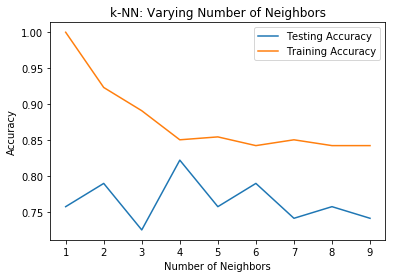

In [25]:
#Using a loop to iterate over many values of k and to choose the one with best accuracy.

from matplotlib import pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.20,random_state=1)
    sc=MinMaxScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#See markdown below.

### From above plot we observe that for k = 4, we have the best testing accuracy and hence k = 4 is the best value.

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [26]:
#Reading Data from csv file.

df_weka3 = pd.read_csv('3Classdata.csv')
df_weka3.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
254,72.955644,19.576971,61.007071,53.378673,111.234047,0.813491,Normal
271,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,Normal
239,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,Normal
130,50.066786,9.120340,32.168463,40.946446,99.712453,26.766697,Spondylolisthesis
146,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,Spondylolisthesis


In [27]:
df_weka3.head()        #Head of Data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [28]:
df_weka3.tail()         #Tail of Data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [29]:
df_weka3.isnull().values.any() 

#DataFrame does not have any null values.

False

In [30]:
df_weka3['class'].unique()

#Class column has only three values namely "Hernia", "Spondylolisthesis" and "Normal".

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [31]:
#Checking data type of all columns.

df_weka3.dtypes   

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

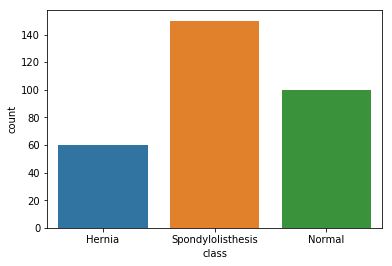

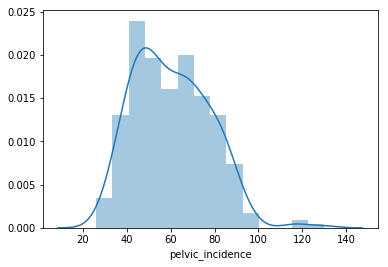

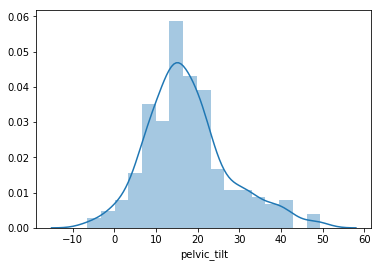

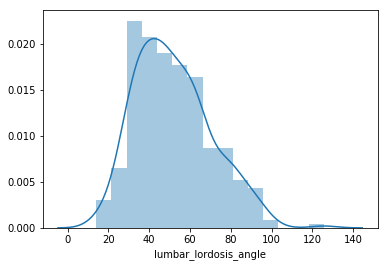

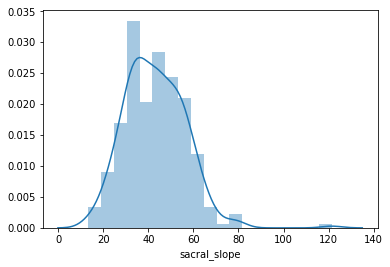

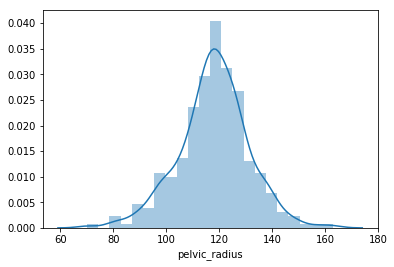

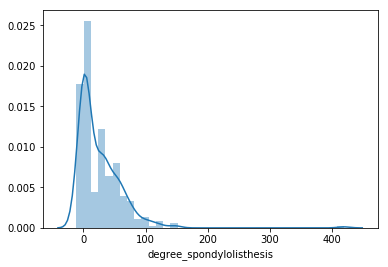

In [32]:
#Distribution of 'class' and all other attributes.

sns.countplot(x = 'class', data = df_weka3)
plt.show()

sns.distplot(df_weka3['pelvic_incidence'])
plt.show()

sns.distplot(df_weka3['pelvic_tilt'])
plt.show()

sns.distplot(df_weka3['lumbar_lordosis_angle'])
plt.show()

sns.distplot(df_weka3['sacral_slope'])
plt.show()

sns.distplot(df_weka3['pelvic_radius'])
plt.show()

sns.distplot(df_weka3['degree_spondylolisthesis'])
plt.show()

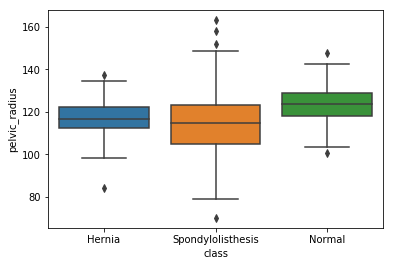

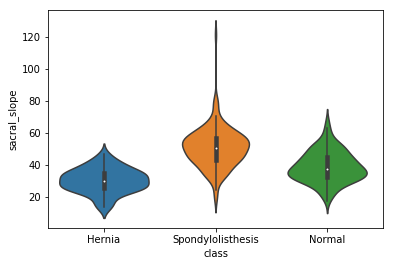

In [33]:
#Distribution of different classes for pelvic_radius and sacral_slope

sns.boxplot(x = 'class', y = 'pelvic_radius', data = df_weka3)
plt.show()

sns.violinplot(x = 'class', y = 'sacral_slope', data = df_weka3)
plt.show()

In [34]:
#Encoding class variable to integer.

df_weka3['class'] = df_weka3['class'].astype('category')
df_weka3['class'] = df_weka3['class'].cat.codes
df_weka3.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
298,66.507179,20.897672,31.727471,45.609507,128.902905,1.517203,1
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,1
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,2
117,86.041280,38.750670,47.871405,47.290610,122.092954,61.988277,2
73,55.512212,20.095157,44.000000,35.417055,122.648753,34.552946,2


In [35]:
#Splitting Data into Target Class and Features.

X = df_weka3.drop(['class'], axis = 1)
y = df_weka3['class']

In [36]:
#Standardizing Data using MinMaxScaler to get values between 0 and 1.

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler() 
model.fit(X)                                      #Learning mean and std. dev. from the features.
scaled_features = model.transform(X)              #Transforming the features.

In [37]:
#Converting scaled features into the DataFrame.

df_feat1 = pd.DataFrame(scaled_features, columns = df_weka3.drop('class', axis = 1).columns)
df_feat1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [38]:
#Splitting data into Training Set and Testing Set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat1, y, test_size = 0.3, random_state =1)

In [39]:
#Building KNN model and predicting Target Values.

from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_rows', 500)

knn = KNeighborsClassifier(n_neighbors = 4)          #Fixing value of neighbors = 4
knn.fit(X_train,y_train)                             #Learning from the data.
pred = knn.predict(X_test)                           #Predicting Target Class.

In [40]:
#Checking classification report and confusion_matrix to see how model performed.

from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:', '\n', classification_report(y_test, pred))
print('\n')
print('Confusion Matrix:', '\n',confusion_matrix(y_test,pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.71      0.60        17
           1       0.60      0.67      0.63        27
           2       0.95      0.78      0.85        49

   micro avg       0.73      0.73      0.73        93
   macro avg       0.69      0.72      0.70        93
weighted avg       0.77      0.73      0.74        93



Confusion Matrix: 
 [[12  4  1]
 [ 8 18  1]
 [ 3  8 38]]


In [41]:
print('Testing Accuracy is:', knn.score(X_test, y_test))

Testing Accuracy is: 0.7311827956989247


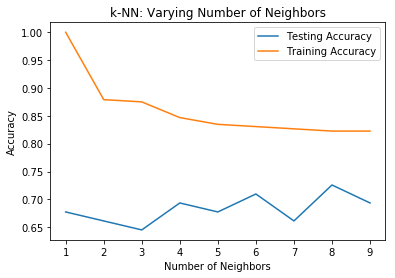

In [42]:
from matplotlib import pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.20,random_state=1)
    sc=MinMaxScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### We observe that the best accuracy is obtained at k = 8. So k = 8 is the optimum value.

# Finished